In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from matplotlib import colors
from matplotlib import colors as mcolors          # Packages to define custom colormaps and animations
from matplotlib.animation import FuncAnimation    
from matplotlib.colors import ListedColormap
from matplotlib.animation import PillowWriter
from tqdm import tqdm
from scipy.optimize import curve_fit
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'serif'             #Change font to Times New Roman
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

<IPython.core.display.Javascript object>


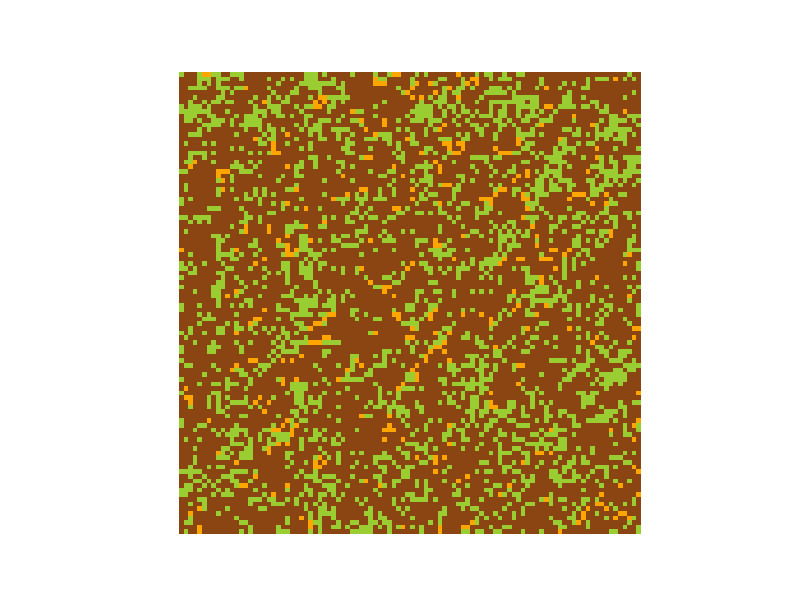

In [2]:
%matplotlib notebook

EMPTY = 0
TREE = 1
FIRE = 2

rows = 100
cols = 100
prob_tree_growth = 0.05                                                  # Probability of tree growth for an empty cell
prob_fire = 0.01                                                         # Probability of a fire starting in a tree cell

tree_probability = np.random.uniform(size=(rows, cols))
grid = np.where(tree_probability < 0.5, EMPTY, TREE)

colors_list = ['saddlebrown', 'yellowgreen', 'orange']
cmap = ListedColormap(colors_list)

fig, ax = plt.subplots()
mat = ax.matshow(grid, cmap=cmap, vmin=0, vmax=2)
ax.axis('off')

def update(frame_number):
    global grid
    new_grid = grid.copy()
    for i in range(rows):
        for j in range(cols):
            if grid[i, j] == FIRE:
                new_grid[i, j] = EMPTY
            elif grid[i, j] == TREE:
                neighbors = [
                    grid[(i - 1) % rows, j],                             # Upper neighbor
                    grid[(i + 1) % rows, j],                             # Lower neighbor
                    grid[i, (j - 1) % cols],                             # Left neighbor
                    grid[i, (j + 1) % cols],                             # Right neighbor
                    grid[(i - 1) % rows, (j + 1) % cols],                # Top-right neighbor
                    grid[(i + 1) % rows, (j - 1) % cols]                 # Bottom-left neighbor
                ]
                if FIRE in neighbors or np.random.uniform() < prob_fire:
                    new_grid[i, j] = FIRE
            elif grid[i, j] == EMPTY and np.random.uniform() < prob_tree_growth:
                new_grid[i, j] = TREE
    grid = new_grid
    mat.set_data(grid)
    return [mat]

ani = animation.FuncAnimation(fig, update, interval=50)
ani.save(
    r"D:\Semester 5\Computational Physics\Assignments\forest_fire.gif",
    writer='pillow', dpi=300, fps=10
)
plt.show()

Simulating Fires: 100%|████████████████████████████████████████████████████████████████| 10/10 [00:01<00:00,  5.22it/s]


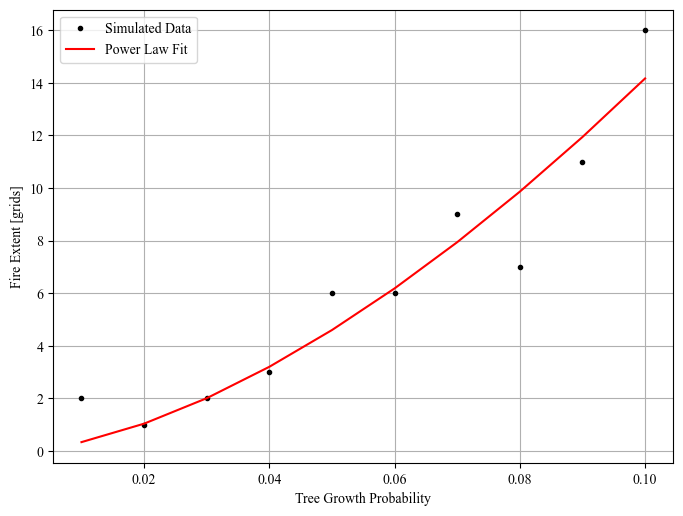

In [12]:
def simulate_fire(rows, cols, prob_tree_growth, prob_fire, iterations):
    tree_probability = np.random.uniform(size=(rows, cols))
    grid = np.where(tree_probability < (1 - prob_tree_growth), EMPTY, TREE)

    for _ in range(iterations):
        new_grid = grid.copy()
        for i in range(rows):
            for j in range(cols):
                if grid[i, j] == FIRE:
                    new_grid[i, j] = EMPTY
                elif grid[i, j] == TREE:
                    neighbors = [
                        grid[(i - 1) % rows, j],               # Upper neighbor
                        grid[(i + 1) % rows, j],               # Lower neighbor
                        grid[i, (j - 1) % cols],               # Left neighbor
                        grid[i, (j + 1) % cols],               # Right neighbor
                        grid[(i - 1) % rows, (j + 1) % cols],  # Top-right neighbor
                        grid[(i + 1) % rows, (j - 1) % cols]   # Bottom-left neighbor
                    ]
                    if FIRE in neighbors or np.random.uniform() < prob_fire:
                        new_grid[i, j] = FIRE
        grid = new_grid

    return grid

def measure_fire_extent(grid):
    return np.count_nonzero(grid == FIRE)

# Parameters
prob_fire = 0.01
iterations = 10  

# Varying probabilities of tree growth
prob_tree_values = np.linspace(0.01, 0.1, 10)
fire_extents = []

for prob_tree_growth in tqdm(prob_tree_values, desc='Simulating Fires'):
    final_state = simulate_fire(rows, cols, prob_tree_growth, prob_fire, iterations)
    fire_extent = measure_fire_extent(final_state)
    fire_extents.append(fire_extent)

# Plotting 
plt.figure(figsize=(8, 6))
plt.plot(prob_tree_values, fire_extents, 'ko', markersize=3, label='Simulated Data')
plt.xlabel('Tree Growth Probability')
plt.ylabel('Fire Extent [grids]')
plt.grid(True)

# Defining the power-law function
def power_law(x, a, b):
    return a * np.power(x, b)

# Fitting the power-law function to the data
fit_params, _ = curve_fit(power_law, prob_tree_values, fire_extents)
plt.plot(prob_tree_values, power_law(prob_tree_values, *fit_params), 'r-', label='Power Law Fit')
plt.legend()
plt.savefig(f"D:\Semester 5\Computational Physics\Assignments\power_law.pdf", dpi=300,
                    bbox_inches="tight", transparent=True)
plt.show()